In [2]:
#!pip install tensorflow

In [3]:
#!pip install scikit-learn

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import tensorflow as tf 

## Load and Preprocess Data

In [5]:
df = pd.read_csv(r"C:\Users\Ouroboros\.cache\kagglehub\datasets\shubhammeshram579\bank-customer-churn-prediction\versions\1\Churn_Modelling.csv")

X = df.iloc[:, 3:-1].values
y = df.iloc[:,-1].values

In [6]:
X.shape

(10002, 10)

In [7]:
df = df.rename(columns=str.lower)
df = df.rename(columns={"tenure": "active_years", 
                        "numofproducts": "num_of_products", 
                        "hascrcard": "credit_card", 
                        "rownumber": "index", 
                        "customerid": "customer_id", 
                        "creditscore": "credit_score", 
                        "isactivemember": "active", 
                       "estimatedsalary": "salary_estimation", 
                       "balance": "account_balance"})

In [8]:
df.head()

,index,customer_id,surname,credit_score,geography,gender,age,active_years,account_balance,num_of_products,credit_card,active,salary_estimation,exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [9]:
df.dropna(inplace=True)
print(df.isnull().sum())

index                0
customer_id          0
surname              0
credit_score         0
geography            0
gender               0
age                  0
active_years         0
account_balance      0
num_of_products      0
credit_card          0
active               0
salary_estimation    0
exited               0
dtype: int64


In [10]:
df.shape

(9998, 14)

## Visualize Data

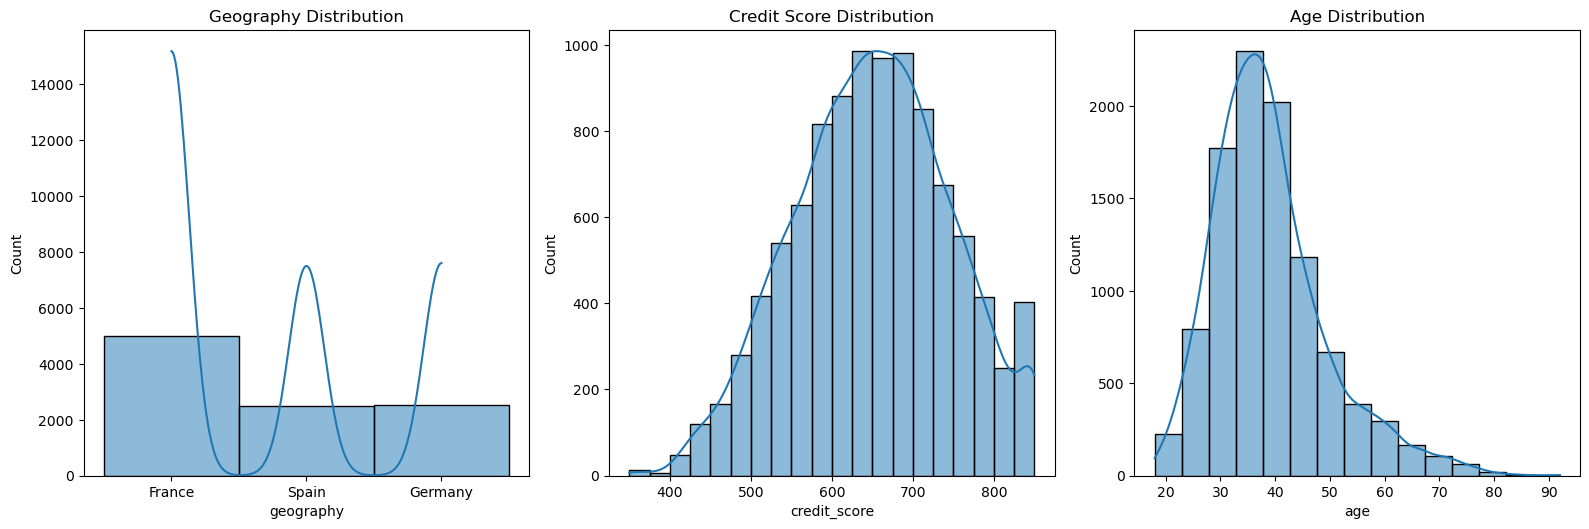

In [11]:
plt.figure(figsize= (16,10))

plt.subplot(2,3,1)
sns.histplot(df["geography"], bins=15, kde=True)
plt.title("Geography Distribution")

plt.subplot(2,3,2)
sns.histplot(df["credit_score"], bins=20, kde=True)
plt.title("Credit Score Distribution")

plt.subplot(2,3,3)
sns.histplot(df["age"], bins=15, kde=True)
plt.title("Age Distribution")

plt.tight_layout()
plt.show()

In [12]:
df.columns

Index(['index', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'active_years', 'account_balance', 'num_of_products',
       'credit_card', 'active', 'salary_estimation', 'exited'],
      dtype='object')

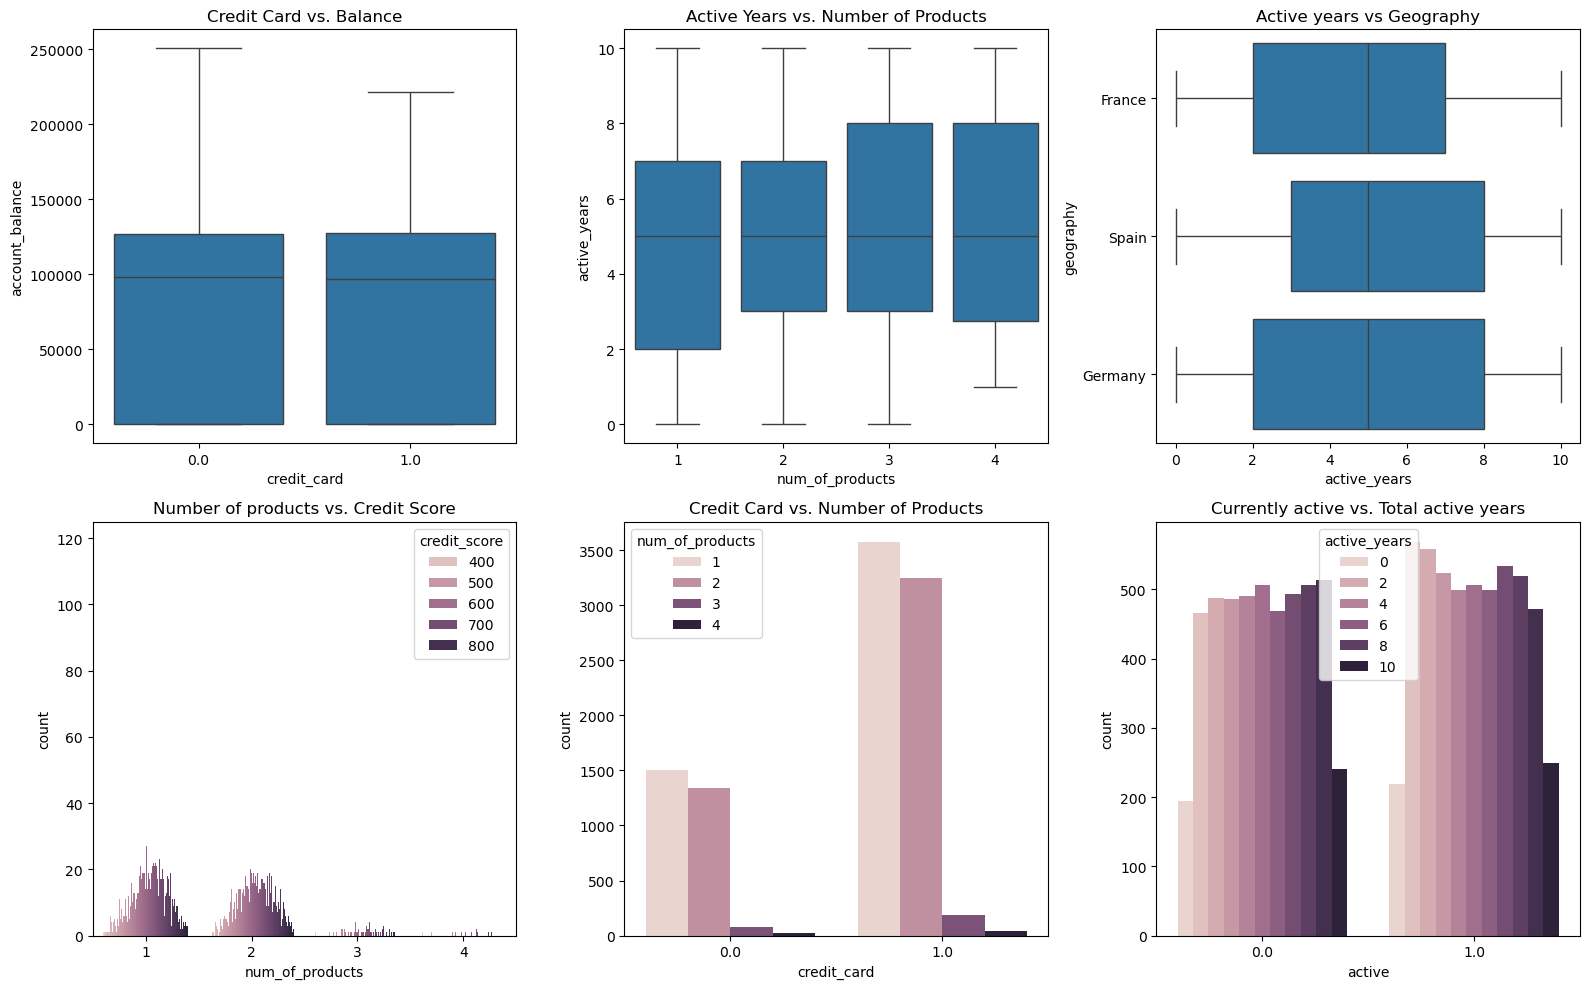

In [13]:
plt.figure(figsize= (16,10))

plt.subplot(2,3,1)
sns.boxplot(x="credit_card", y="account_balance", data=df)
plt.title("Credit Card vs. Balance")

plt.subplot(2,3,2)
sns.boxplot(x="num_of_products", y="active_years", data=df)
plt.title("Active Years vs. Number of Products")

plt.subplot(2,3,3)
sns.boxplot(x="active_years", y="geography", data=df)
plt.title("Active years vs Geography")

plt.subplot(2,3,4)
sns.countplot(x="num_of_products", hue="credit_score", data=df)
plt.title("Number of products vs. Credit Score")

plt.subplot(2,3,5)
sns.countplot(x="credit_card", hue="num_of_products", data=df)
plt.title("Credit Card vs. Number of Products")

plt.subplot(2,3,6)
sns.countplot(x="active", hue="active_years", data=df)
plt.title("Currently active vs. Total active years")

plt.tight_layout()
plt.show()

## Encoding Categorical data

In [14]:
df.columns

Index(['index', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'active_years', 'account_balance', 'num_of_products',
       'credit_card', 'active', 'salary_estimation', 'exited'],
      dtype='object')

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

le = LabelEncoder()

# Encode the Gender column 
X[:, 2] = le.fit_transform(X[:, 2])

# OneHotEncode the Geography Column
ct = ColumnTransformer(transformers= [("encoder", 
                                        OneHotEncoder(sparse_output=False, 
                                                      handle_unknown="ignore"), 
                                        [1])], 
                       remainder = "passthrough")

X = ct.fit_transform(X)

print("Shape after OneHotEncoding:", X.shape) # Add this line to check shape

Shape after OneHotEncoding: (10002, 13)


In [35]:
print(X[3])
print(y[3])

[1.0 0.0 0.0 0.0 699 0 39.0 1 0.0 2 0.0 0.0 93826.63]
0


## Splitting the data into training and test sets

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scale the features

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Check shapes (optional)
print("X_train shape:", X_train.shape)  
print("X_test shape:", X_test.shape)

X_train shape: (8001, 13)
X_test shape: (2001, 13)


## Build the model

In [20]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Input, Dropout

def build_model(input_shape):
    model = Sequential([
        Input(shape=input_shape), # Input Layer 
        Dense(64, activation="relu"), #First hidden layer with 64 neurons and ReLU activation
        Dropout(0.5), 
        Dense(32, activation="relu"), #Second hidden layer with 32 neurons and ReLU activation
        Dropout(0.5),
        Dense(1, activation="sigmoid") #Output layer with 1 neuron and Sigmoid activation
    ])
    return model

input_shape = (X_train.shape[1],)
model = build_model(input_shape)

## Compile the model 

In [21]:
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss= "binary_crossentropy", 
              metrics= ["accuracy"])

early_stopping = EarlyStopping(monitor="val_loss", 
                               patience=10, 
                               restore_best_weights=True)

#Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [22]:
history = model.fit(
    X_train, y_train,
    epochs= 200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6981 - loss: 0.6009 - val_accuracy: 0.8070 - val_loss: 0.4395
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7962 - loss: 0.4815 - val_accuracy: 0.8095 - val_loss: 0.4246
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8041 - loss: 0.4518 - val_accuracy: 0.8214 - val_loss: 0.4180
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8041 - loss: 0.4401 - val_accuracy: 0.8245 - val_loss: 0.4117
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8060 - loss: 0.4445 - val_accuracy: 0.8320 - val_loss: 0.4038
Epoch 6/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8214 - loss: 0.4207 - val_accuracy: 0.8426 - val_loss: 0.3948
Epoch 7/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8226 - loss: 0.4218 - val_accuracy: 0.8451 - val_loss: 0.3880
Epoch 8/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8263 - loss: 0.4181 - val_accu

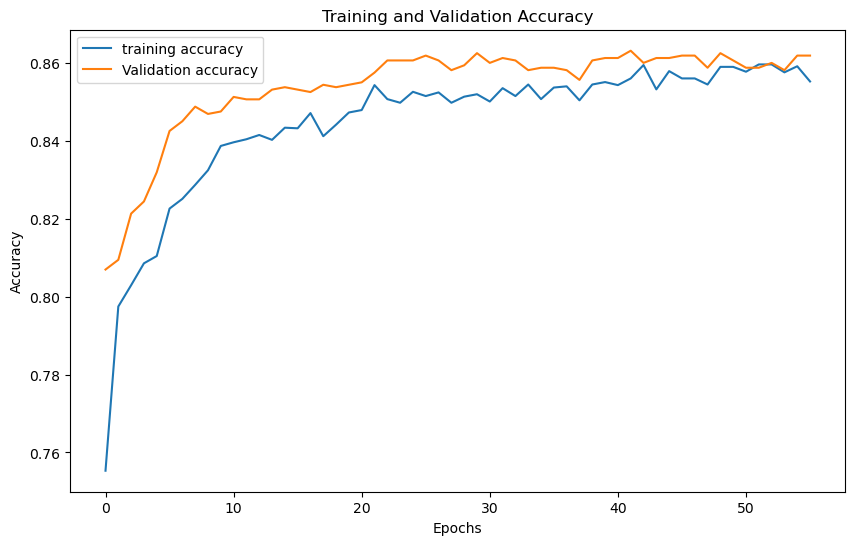

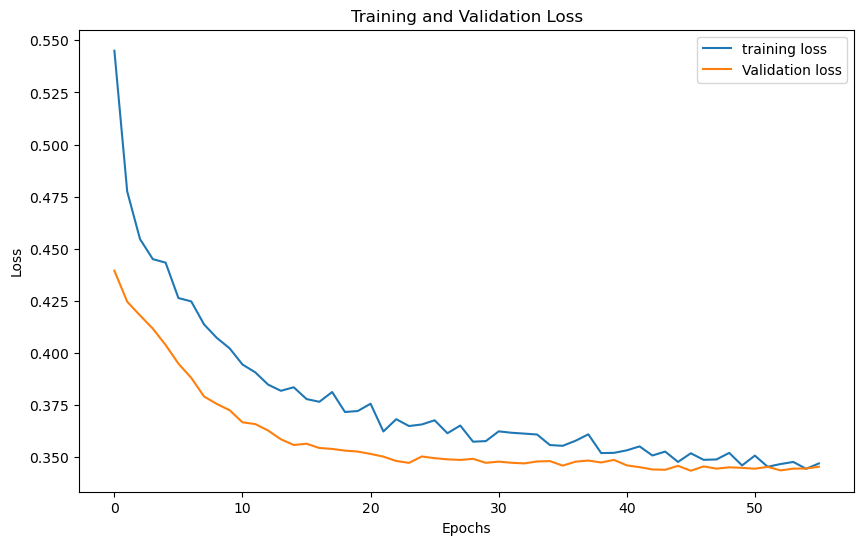

In [23]:
# plot training history
def plot_history(history, metric):
    plt.figure(figsize=(10,6))
    plt.plot(history.history[metric], label=f"training {metric}")
    plt.plot(history.history[f"val_{metric}"], label=f"Validation {metric}")
    plt.xlabel("Epochs")
    plt.ylabel(metric.capitalize())
    plt.title(f"Training and Validation {metric.capitalize()}")
    plt.legend()
    plt.show()

plot_history(history, "accuracy")
plot_history(history, "loss")

## Evalute the model 

In [24]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8704 - loss: 0.3354
Test loss: 0.3411
Test Accuracy: 0.8651


## Predict Customer Churn

In [28]:
df.head()

,index,customer_id,surname,credit_score,geography,gender,age,active_years,account_balance,num_of_products,credit_card,active,salary_estimation,exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [36]:
p1 = model.predict(scaler.transform([[1, 0, 0, 0, 619, 0, 42, 2, 0, 1, 1, 1, 101348.88]]))
p2 = model.predict(scaler.transform([[0, 0, 1, 0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58]]))
p3 = model.predict(scaler.transform([[1.0, 0.0, 0.0, 0.0, 502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57]]))
p4 = model.predict(scaler.transform([[1.0, 0.0, 0.0, 0.0, 699, 0, 39.0, 1, 0.0, 2, 0.0, 0.0, 93826.63]]))

print(p1, p2, p3, p4)

print(p1 > 0.5)
print(p2 > 0.5)
print(p3 > 0.5)
print(p4 > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
[[0.32643703]] [[0.23412113]] [[0.9901229]] [[0.0589659]]
[[False]]
[[False]]
[[ True]]
[[False]]
